## Laboratorio 5 - Data Science

Integrantes:

Jorge Caballeros 20009

Alejandra Guzman 20262

In [14]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Cargar el archivo CSV
data = pd.read_csv('train.csv')

# Mostrar las primeras filas del dataset
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [15]:

# Lista básica de stopwords en español
basic_stopwords = [
    "a", "al", "algo", "algunas", "algunos", "ante", "antes", "como", "con", "contra", "cual", "cuando", 
    "de", "del", "desde", "donde", "durante", "e", "el", "ella", "ellas", "ellos", "en", "entre", "era", 
    "erais", "eran", "eras", "eres", "es", "esa", "esas", "ese", "eso", "esos", "esta", "estaba", "estabais", 
    "estaban", "estabas", "estad", "estada", "estadas", "estado", "estados", "estamos", "estando", "estar", 
    "estaremos", "estará", "estarán", "estarás", "estaré", "estaréis", "estaría", "estaríais", "estaríamos", 
    "estarían", "estarías", "estas", "este", "estemos", "esto", "estos", "estoy", "estuve", "estuviera", 
    "estuvierais", "estuvieran", "estuvieras", "estuvieron", "estuviese", "estuvieseis", "estuviesen", 
    "estuvieses", "estuvimos", "estuviste", "estuvisteis", "estuviéramos", "estuviésemos", "estuvo", "está", 
    "estábamos", "estáis", "están", "estás", "esté", "estéis", "estén", "estés", "fue", "fuera", "fuerais", 
    "fueran", "fueras", "fueron", "fuese", "fueseis", "fuesen", "fueses", "fui", "fuimos", "fuiste", "fuisteis", 
    "fuéramos", "fuésemos", "ha", "habida", "habidas", "habido", "habidos", "habiendo", "habremos", "habrá", 
    "habrán", "habrás", "habré", "habréis", "habría", "habríais", "habríamos", "habrían", "habrías", "habéis", 
    "había", "habíais", "habíamos", "habían", "habías", "han", "has", "hasta", "hay", "haya", "hayamos", "hayan", 
    "hayas", "hayáis", "he", "hemos", "hube", "hubiera", "hubierais", "hubieran", "hubieras", "hubieron", 
    "hubiese", "hubieseis", "hubiesen", "hubieses", "hubimos", "hubiste", "hubisteis", "hubiéramos", "hubiésemos", 
    "hubo", "la", "las", "le", "les", "lo", "los", "me", "mi", "mis", "mucho", "muchos", "muy", "más", "mí", 
    "mía", "mías", "mío", "míos", "nada", "ni", "no", "nos", "nosotras", "nosotros", "nuestra", "nuestras", 
    "nuestro", "nuestros", "o", "os", "otra", "otras", "otro", "otros", "para", "pero", "poco", "por", "porque", 
    "que", "quien", "quienes", "qué", "se", "sea", "seamos", "sean", "seas", "sentid", "sentida", "sentidas", 
    "sentido", "sentidos", "seremos", "será", "serán", "serás", "seré", "seréis", "sería", "seríais", "seríamos", 
    "serían", "serías", "seáis", "siente", "sin", "sintiendo", "sobre", "sois", "somos", "son", "soy", "su", 
    "sus", "suya", "suyas", "suyo", "suyos", "sí", "también", "tanto", "te", "tendremos", "tendrá", "tendrán", 
    "tendrás", "tendré", "tendréis", "tendría", "tendríais", "tendríamos", "tendrían", "tendrías", "tened", 
    "tenemos", "tenga", "tengamos", "tengan", "tengas", "tengo", "tengáis", "tenida", "tenidas", "tenido", 
    "tenidos", "teniendo", "tenéis", "tenía", "teníais", "teníamos", "tenían", "tenías", "ti", "tiene", "tienen", 
    "tienes", "todo", "todos", "tu", "tus", "tuve", "tuviera", "tuvierais", "tuvieran", "tuvieras", "tuvieron", 
    "tuviese", "tuvieseis", "tuviesen", "tuvieses", "tuvimos", "tuviste", "tuvisteis", "tuviéramos", "tuviésemos", 
    "tuvo", "tuya", "tuyas", "tuyo", "tuyos", "tú", "un", "una", "uno", "unos", "vosotras", "vosotros", "vuestra", 
    "vuestras", "vuestro", "vuestros", "y", "ya", "yo", "él", "éramos"
]

def clean_text_basic_stopwords(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Quitar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Quitar los caracteres especiales como # o @ y emoticones
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    
    # Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    



def clean_text_basic_stopwords(text):
    # Convertir a minúsculas
    text = text.lower()
    
    # Quitar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Quitar los caracteres especiales como # o @ y emoticones
    text = re.sub(r'\@\w+|\#\w+', '', text)
    text = re.sub(r'[\U00010000-\U0010ffff]', '', text)
    
    # Quitar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Quitar números
    text = re.sub(r'\d+', '', text)
    
    # Quitar stopwords
    text = ' '.join([word for word in text.split() if word not in basic_stopwords])
    
    return text

# Limpiar todos los tweets con la lista básica de stopwords
data['cleaned_text'] = data['text'].apply(clean_text_basic_stopwords)

# Mostrar algunos tweets limpios
data[['text', 'cleaned_text']].head()


,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this may allah for...
1,Forest fire near La Ronge Sask. Canada,forest fire near ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",people receive evacuation orders in california
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby as smoke fr...


In [16]:
from collections import Counter

# Separar los textos limpios por categoría (desastre o no desastre)
disaster_texts = ' '.join(data[data['target'] == 1]['cleaned_text'].tolist())
non_disaster_texts = ' '.join(data[data['target'] == 0]['cleaned_text'].tolist())

# Obtener las frecuencias de palabras para cada categoría
disaster_freq = Counter(disaster_texts.split())
non_disaster_freq = Counter(non_disaster_texts.split())

# Obtener las 20 palabras más comunes para cada categoría
top_disaster_words = disaster_freq.most_common(20)
top_non_disaster_words = non_disaster_freq.most_common(20)

top_disaster_words, top_non_disaster_words


([('the', 1358),
  ('in', 1159),
  ('of', 922),
  ('to', 757),
  ('and', 501),
  ('on', 417),
  ('for', 399),
  ('is', 348),
  ('i', 321),
  ('at', 305),
  ('by', 275),
  ('from', 244),
  ('with', 192),
  ('that', 185),
  ('this', 181),
  ('after', 181),
  ('fire', 177),
  ('it', 176),
  ('was', 168),
  ('as', 167)],
 [('the', 1903),
  ('to', 1188),
  ('i', 1076),
  ('and', 917),
  ('of', 901),
  ('in', 817),
  ('you', 664),
  ('is', 595),
  ('my', 544),
  ('for', 491),
  ('on', 436),
  ('it', 391),
  ('with', 380),
  ('that', 376),
  ('this', 296),
  ('be', 288),
  ('like', 253),
  ('by', 244),
  ('im', 243),
  ('have', 242)])

Es evidente que muchas palabras comunes, como "the", "in", "of", y "to", aparecen en ambas listas. Estas palabras, a pesar de ser frecuentes, pueden no ser muy útiles para la clasificación, ya que aparecen tanto en tweets de desastres como en tweets que no lo son. Sin embargo, palabras como "fire" y "after" podrían ser indicativas de un desastre.

In [17]:
def get_ngrams(text, n):
    tokens = text.split()
    return list(ngrams(tokens, n))

disaster_bigrams = get_ngrams(disaster_texts, 2)
non_disaster_bigrams = get_ngrams(non_disaster_texts, 2)

disaster_trigrams = get_ngrams(disaster_texts, 3)
non_disaster_trigrams = get_ngrams(non_disaster_texts, 3)

# Obtener las frecuencias de bigramas y trigramas
disaster_bigram_freq = Counter(disaster_bigrams)
non_disaster_bigram_freq = Counter(non_disaster_bigrams)

disaster_trigram_freq = Counter(disaster_trigrams)
non_disaster_trigram_freq = Counter(non_disaster_trigrams)

# Obtener los 20 bigramas y trigramas más comunes para cada categoría
top_disaster_bigrams = disaster_bigram_freq.most_common(20)
top_non_disaster_bigrams = non_disaster_bigram_freq.most_common(20)

top_disaster_trigrams = disaster_trigram_freq.most_common(20)
top_non_disaster_trigrams = non_disaster_trigram_freq.most_common(20)

top_disaster_bigrams, top_non_disaster_bigrams, top_disaster_trigrams, top_non_disaster_trigrams

([(('in', 'the'), 144),
  (('of', 'the'), 118),
  (('suicide', 'bomber'), 59),
  (('on', 'the'), 53),
  (('at', 'the'), 43),
  (('more', 'than'), 43),
  (('have', 'been'), 42),
  (('northern', 'california'), 41),
  (('by', 'the'), 41),
  (('and', 'the'), 38),
  (('oil', 'spill'), 38),
  (('killed', 'in'), 37),
  (('to', 'the'), 37),
  (('the', 'latest'), 36),
  (('the', 'fatal'), 36),
  (('to', 'be'), 35),
  (('for', 'the'), 34),
  (('suicide', 'bombing'), 34),
  (('from', 'mh'), 34),
  (('on', 'fire'), 33)],
 [(('in', 'the'), 165),
  (('of', 'the'), 138),
  (('to', 'the'), 91),
  (('on', 'the'), 82),
  (('to', 'be'), 73),
  (('for', 'the'), 64),
  (('i', 'just'), 55),
  (('is', 'the'), 48),
  (('going', 'to'), 48),
  (('if', 'you'), 48),
  (('at', 'the'), 43),
  (('i', 'have'), 43),
  (('i', 'dont'), 43),
  (('and', 'the'), 41),
  (('and', 'i'), 41),
  (('want', 'to'), 39),
  (('you', 'are'), 38),
  (('will', 'be'), 38),
  (('cross', 'body'), 38),
  (('in', 'my'), 36)],
 [(('northern'

Los bigramas y trigramas pueden considerarse utiles en terminos de contexto. Considerar estos en un modelo de clasificacion puede mejorar la capacidad de capturar y entender el contexto; lo cual por ende mejoraria el rendimiento.

## 5. Analisis Exploratorio de los datos

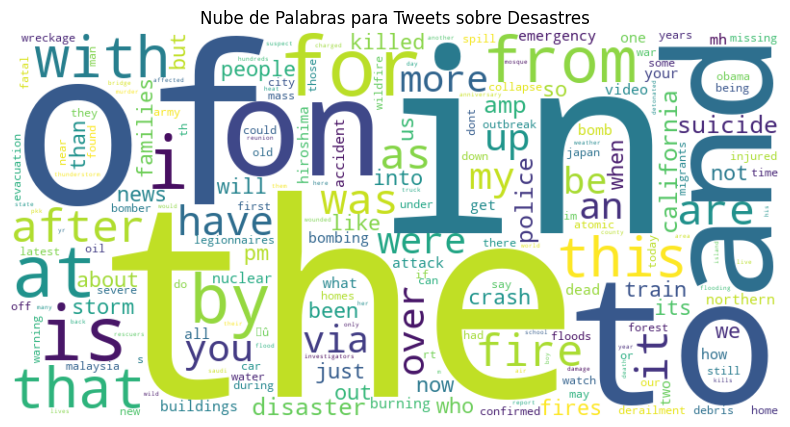

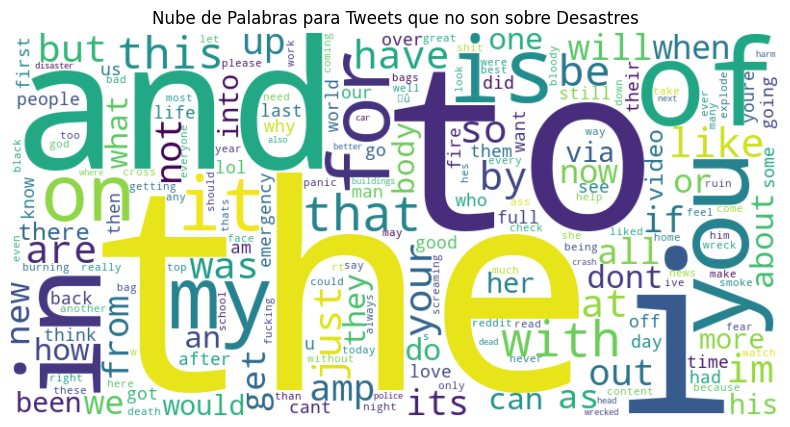

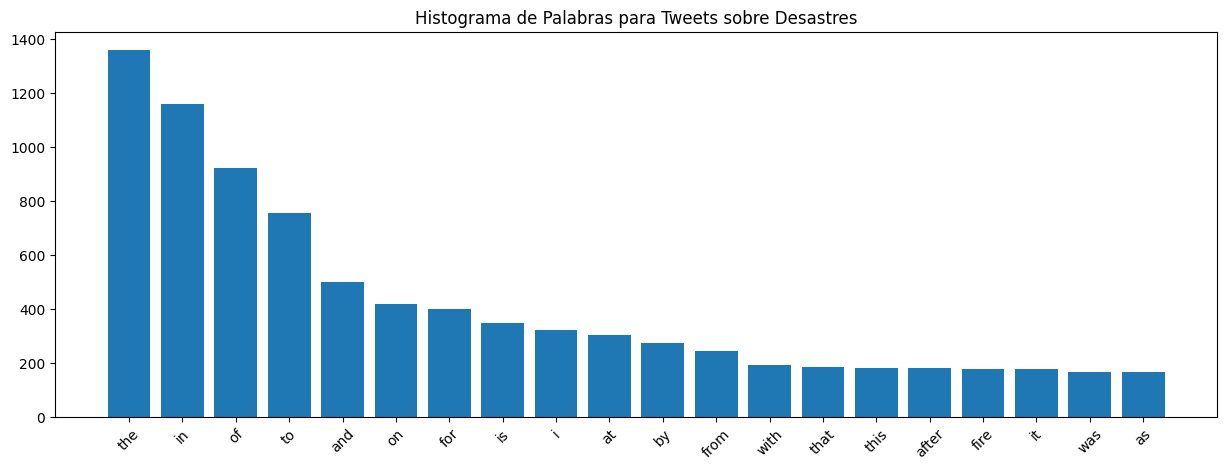

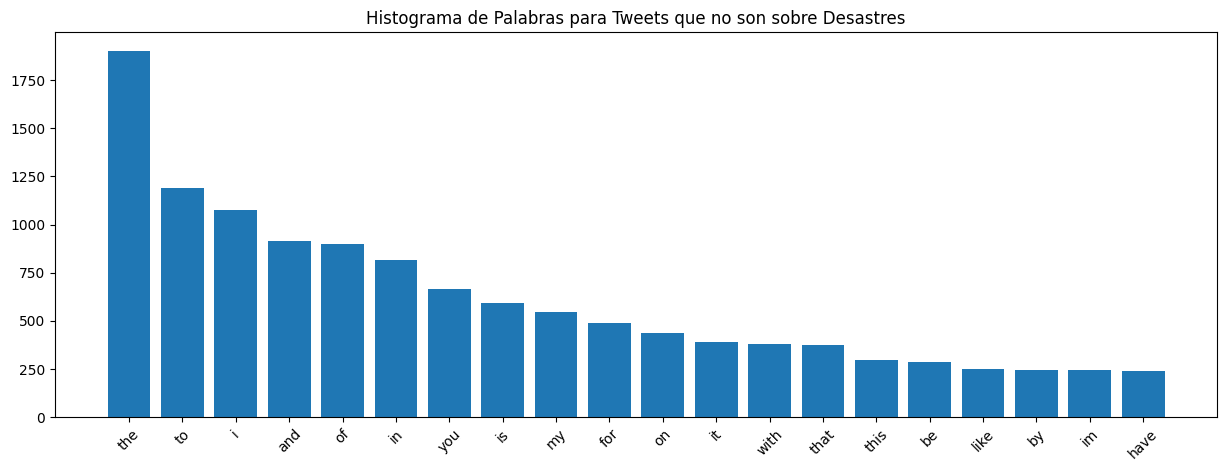

In [18]:
def generate_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Función para generar un histograma
def generate_histogram(freq_list, title):
    words = [word[0] for word in freq_list]
    frequencies = [word[1] for word in freq_list]
    
    plt.figure(figsize=(15, 5))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.show()

# Generar nube de palabras para tweets de desastres
generate_wordcloud(disaster_freq, "Nube de Palabras para Tweets sobre Desastres")

# Generar nube de palabras para tweets que no son de desastres
generate_wordcloud(non_disaster_freq, "Nube de Palabras para Tweets que no son sobre Desastres")

# Generar histograma para las 20 palabras más frecuentes en tweets de desastres
generate_histogram(top_disaster_words, "Histograma de Palabras para Tweets sobre Desastres")

# Generar histograma para las 20 palabras más frecuentes en tweets que no son de desastres
generate_histogram(top_non_disaster_words, "Histograma de Palabras para Tweets que no son sobre Desastres")

En los tweets sobre desastres, palabras como "the", "in" y "of" son las más repetidas, aunque estas palabras por sí solas no son particularmente indicativas de un desastre. En los tweets que no son sobre desastres, también vemos palabras comunes como "the", "to" e "i". 